# Simple Pendulum Program


The equations of motion for a simple pendulum are:

$$  \frac{d \omega}{dt} = a(\theta); \; \; \; \; \; \frac{d \theta}{dt} = \omega $$

where the angular acceleration is $a(\theta) = -(g/L) sin(\theta)$.


Euler Method:

$$ \theta_{n+1} = \theta_{n} + \tau \omega_{n} $$

$$ \omega_{n+1} = \omega_{n} + \tau a_{n} $$

Verlet Method:

$$ \theta_{n+1} = 2 \theta_{n} - \theta_{n-1} + \tau^2 a_n$$


In [1]:
def euler(theta,omega,tau,acc):
    
    thetan = theta + tau*omega
    
    omegan = omega + tau*acc(theta)
    
    return thetan,omegan;

In [25]:
thetainit = 0.1  #inital conditions

omegainit = 0.0

In [26]:
g = 9.8; #m/s2

L = 1; #m

In [27]:
import numpy as np

def acc(x):
    return -(g/L)*np.sin(x);



In [53]:
tau = 0.01;
N=1000;

In [54]:
time = np.array([0])
theta = np.array([thetainit])
omega = np.array([omegainit])

In [55]:
for t in range(0,N):
    
    time = np.append(time,tau*(t+1))
    
    
    then,omegn = euler(theta[t],omega[t],tau,acc)
    
    theta = np.append(theta,then)
    omega = np.append(omega,omegn)
    
    if(theta[t] == 0):
        print(time[t])

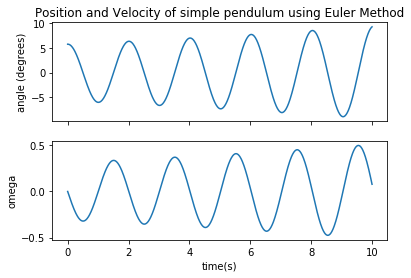

In [70]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True)
ax[0].plot(time,theta*180/np.pi)
ax[0].set_title("Position and Velocity of simple pendulum using Euler Method")
ax[1].set_xlabel("time(s)")
ax[0].set_ylabel("angle (degrees)")  
ax[1].set_ylabel("omega") 
ax[1].plot(time,omega)

fig.savefig("Eulertime.pdf")

In [127]:
time = np.array([0])
theta = np.array([thetainit])
omega = np.array([omegainit])

In [128]:
def verlet(thetaprev,theta,tau,acc):
    thetan = 2*theta - thetaprev + tau**2 * acc(theta)
    
    return thetan

In [129]:
for i in range(0,N):
    time = np.append(time,tau*(i+1))
    
    if(i==0):
        thetaprev = theta[0]-tau*omega[0]+tau**2/2 * acc(theta[0])
    else:
        thetaprev = theta[i-1];
        
    thetan = verlet(thetaprev,theta[i],tau,acc);
    theta = np.append(theta,thetan)

In [130]:
plt.plot(time,theta*180/np.pi,'b--')
plt.xlabel("time(s)")
plt.xlabel("angle(degrees)")
plt.title("Theta as a function of time using verlet method")
plt.savefig("Velettime.pdf")

In [131]:
np.cos(theta)

array([0.99500417, 0.99500426, 0.99500456, ..., 0.99957216, 0.99958446,
       0.99959659])

In [137]:
from matplotlib.animation import FuncAnimation

fig,ax = plt.subplots()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
line, = ax.plot([],[],"ro")


def animate(i):
    xvalue = L*np.cos(theta[i])
    yvalue = L*np.sin(theta[i])
    line.set_data(xvalue,yvalue)
    
    return line,


animation = FuncAnimation(fig,func=animate,frames=500)
animation.save('simple_pendulum.mp4', fps=30, writer='PillowWriter')

plt.show()

<IPython.core.display.Javascript object>

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


ValueError: unknown file extension: .mp4